[Indice](index.ipynb) | Previo: [Mecanica.Cinematica.SolucionEdM](05.01.02.00.Mecanica.Cinematica.SolucionEdM.ipynb) | Siguiente: [Mecanica.Dinamica.Cantidades](05.02.00.00.Mecanica.Dinamica.Cantidades.ipynb)

### 5.1.6. Integración numérica de la e.d.m.
<a id='integracion_numerica_edm'></a>

En aquellos sistemas dinámicos en los que resolver la e.d.m. o encontrar *todas* las constantes de movimiento (resolver por cuadratura el sistema), sea imposible matemáticamente o simplemente muy difícil, es posible buscar una solución aproximada usando los métodos numéricos que estudiamos al final de la [Seccion *Ecuaciones diferenciales*](04.01.03.00.Fundamentos.Calculo.EcuacionesDiferenciales.ipynb#ecuaciones_diferenciales).  

Como vimos allí, para hacerlo, es necesario primero escribir la e.d.m. como el conjunto de 6 ecuaciones diferenciales de primer orden con la forma general (Ec. [ecuaciones_reducidas](#mjx-eqn-eq%3Aecuaciones_reducidas)):

\begin{equation}
\label{eq:edm_ecuaciones_reducidas}
\{\dot{Y_i} = f_i(t,\{Y_k\})\}_{6}
\end{equation}

Donde $Y_i$ ($i=0,1,2,\ldots,5$) son las denominadas funciones auxiliares que reemplazan aquí a las cantidades claves del sistema dinámico (las componentes de $\vec r$ y $\vec v$).  En física, llamaremos a las Ecs. ([edm_ecuaciones_reducidas](#mjx-eqn-eq%3Aedm_ecuaciones_reducidas)), *ecuaciones de movimiento reducidas* del sistema o *e.d.m.r.*

Si comparamos la forma general de las e.d.m.r. en la Ec. ([edm_ecuaciones_reducidas](#mjx-eqn-eq%3Aedm_ecuaciones_reducidas)) con las ecuaciones de primer orden ([edm_primer_orden_escalar](#mjx-eqn-eq%3Aedm_primer_orden_escalar)), podemos hacer la siguiente identificación para las variables auxiliares $Y_i$:

\begin{equation}
\label{eq:variables_auxiliares_edm}
\begin{array}{ccc}
Y_0 = x, & Y_1 = y, & Y_2 = z\\
Y_3 = v_x, & Y_4 = v_y, & Y_5 = v_z\\
\end{array}
\end{equation}

Por otro lado, las funciones $f_i$ serán:

$$
\begin{array}{ccc}
f_0(t,\{Y_k\}) = v_x = Y_3, & f_1(t,\{Y_k\}) = v_y = Y_4, & f_2(t,\{Y_k\}) = v_z = Y_5\\
f_3(t,\{Y_k\}) = a_x, & f_4(t,\{Y_k\}) = a_y, & f_5(t,\{Y_k\}) = a_z\\
\end{array}
$$

Con esta identificación, una forma compacta de escribir las e.d.m.r., muy útil a la hora de preparar algoritmos, es:

\begin{equation}
\label{eq:edm_reducidas_particula}
\dot Y_i = 
\left\{
\begin{array}{ccc}
Y_{3+i} & {\rm ,} & 0 \leq i < 3 \\
a_{i-3}  & {\rm ,} & 3\leq i < 6 
\end{array}
\right.
\end{equation}
Donde hemos introducido la notación $\{a_0,a_1,a_2\}\equiv\{a_x,a_y,a_z\}$.

#### Integración numérica de las e.d.m. del ejemplo 1

El sistema dinámico del ejemplo 1 introducido en [la Sección *Integración por cuadraturas*](05.01.02.00.Mecanica.Cinematica.SolucionEdM.ipynb#integracion_cuadraturas) se caracteriza por tener una aceleración del tipo $\vec a:(j_0t,0,0)$.  En términos de la parametrización de la e.d.m.r. en la Ec. ([edm_reducidas_particula](#mjx-eqn-eq%3Aedm_reducidas_particula)), esto significa que $\{a_0,a_1,a_2\}=(j_0t,0,0)$.

El sistema de ecuaciones diferenciales que describe el sistema puede implementarse en `Python` usando la rutina:

<a id='code:edm_ejemplo1'></a>

In [1]:
def edm_ejemplo1(Y,t,j0=1):
    dYdt=[0,0,0,0,0,0]
    
    dYdt[:3]=Y[3:]
    dYdt[3:]=[j0*t,0,0]
    
    return dYdt

Aunque al final de la [Seccion *Ecuaciones diferenciales*](04.01.03.00.Fundamentos.Calculo.EcuacionesDiferenciales.ipynb#ecuaciones_diferenciales) nos habíamos familiarizado con este tipo de rutinas, el diseño de está en particular merece algunos comentarios:

- Como sabemos, el propósito de esta rutina es calcular la lista de los valores de las funciones $f_i$ (lado derecho de las Ecs. [edm_ecuaciones_reducidas](#mjx-eqn-eq%3Aedm_ecuaciones_reducidas)) que son iguales a las primeras derivada en el tiempo de las variables auxiliares $\dot{Y}_i$. En la rutina, para hacer más explícito su significado, hemos decidido llamar a esta lista `dYdt` en lugar de `f`.  Los nombres de las variables no afectan la funcionalidad de las rutinas, pero pueden hacerla más legible y modificable.

- Para asignar los valores de la lista `dYdt` hemos aprovechado el poder de `Python` para sacar *trozos*, *porciones* o *tajadas* (*slices* en inglés) de listas y arreglos.  Así el trozo `dYdt[:3]` corresponde a las primeras tres componentes `dYdt[0]`, `dYdt[1]`, `dYdt[2]` (nótese que, por empezar en 0, este trozo no incluye la componente `dYdt[3]`.)  Por otra parte el trozo `Y[3:]` de esta lista, corresponde a las componentes `Y[3]`, `Y[4]`, `Y[5]`.  Por tanto, la igualdad `dYdt[:3]=dYdt[3:]` equivale a escribir explícitamente `dYdt[0]=Y[3]`, `dYdt[1]=Y[4]`, `dYdt[2]=Y[5]` que justamente implementa la parte $\dot{Y}_i=Y_{i+3}$ de la Ec. ([edm_reducidas_particula](#mjx-eqn-eq%3Aedm_reducidas_particula))

Una vez escrita la rutina, la solución se obtiene siguiendo los algoritmos introducidos al final de la [Seccion *Ecuaciones diferenciales*](04.01.03.00.Fundamentos.Calculo.EcuacionesDiferenciales.ipynb#ecuaciones_diferenciales):

In [2]:
#Valor del tiron
j0=0.5

#Condiciones iniciales
from numpy import array
Yos=array([1,0,0,-3,0,0])

#Tiempos para obtener la solución
from numpy import linspace
ts=linspace(0.0,5.0,20)

#Solución con odeint
from scipy.integrate import odeint
Ys=odeint(edm_ejemplo1,Yos,ts,args=(j0,))

In [3]:
print(f"Solucion, Ys:\n{Ys[:5]}\n...")

Solucion, Ys:
[[ 1.          0.          0.         -3.          0.          0.        ]
 [ 0.21204503  0.          0.         -2.98268698  0.          0.        ]
 [-0.56679785  0.          0.         -2.93074792  0.          0.        ]
 [-1.32741651  0.          0.         -2.84418283  0.          0.        ]
 [-2.06069881  0.          0.         -2.72299169  0.          0.        ]]
...


Podemos, finalmente, visualizar la solución a la e.d.m.r. haciendo un gráfico de la coordenada $x$ (columna `Ys[:,0]` de la matriz de solución) como función del tiempo `ts`:

In [4]:
%matplotlib nbagg

<a id='code:ejemplo1_grafico_solucion'></a>

<IPython.core.display.Javascript object>


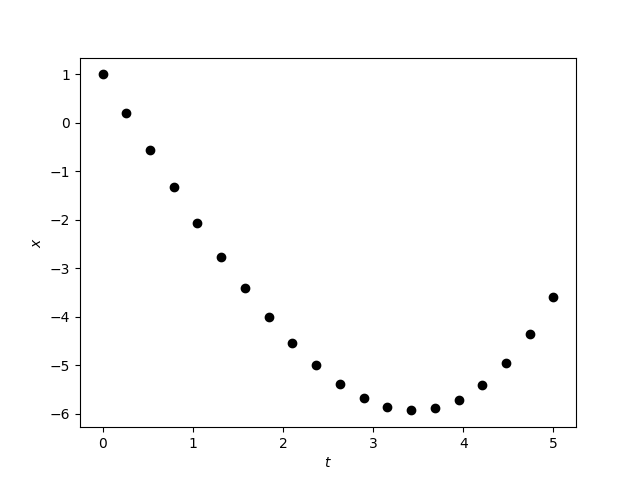

In [5]:
import matplotlib.pyplot as plt
plt.figure();
plt.plot(ts,Ys[:,0],'ko');

plt.xlabel("$t$");
plt.ylabel("$x$");
plt.show();

<a id='code:ejemplo1_grafico_solucion'></a><center><b>Figura 5.37.</b> La figura muestra la solución numérica a la e.d.m. de un sistema sometido a un tirón constante $\vec j=j_0\hat{e}_x$.</center>

¿Cómo saber si la solución obtenida con `odeint` y mostrada en la Figura ([code:ejemplo1_grafico_solucion](#fig:code:ejemplo1_grafico_solucion)) es la correcta?  

Existen dos manera de comprobarlo.  La primera es verificar que las posiciones y velocidades obtenidas satisfagan las constantes de movimiento que escribimos en las Ecs. ([constantes_ejemplo1](#mjx-eqn-eq%3Aconstantes_ejemplo1)). 

Así por ejemplo, podemos verificar que el valor de $I_x$ y $S_x$ sean efectivamente constantes:

In [6]:
#Extraemos los valores de x y dxdt de la solución
xs=Ys[:,0]
xdots=Ys[:,3]

#Fórmula de la constante C_Ix
C_Ixs=xdots-0.5*j0*ts**2

#Fórmula de la constante C_Sx
C_Sxs=xs-(1./6)*j0*ts**3-C_Ixs*ts

In [7]:
import numpy as np
np.set_printoptions(precision=3)
print(f"Valores de C_Ix = {C_Ixs[:5]}...")
print(f"Valores de C_Sx = {C_Sxs[:5]}...")

Valores de C_Ix = [-3. -3. -3. -3. -3.]...
Valores de C_Sx = [1. 1. 1. 1. 1.]...


Comprobamos así que las fórmulas $C_{Ix}=\dot{x}-j_0t^2/2$ y $C_{Sx}=x-j_0t^3/6-I_x t$, tienen el mismo valor para todos los tiempos en los que integramos la e.d.m.r., es decir, son, por definición, constantes de movimiento.  La solución numérica, por tanto,satisface nuestras expectativas matemáticas.

La segunda manera de verificar que nuestra solución numérica coincida con la analítica es compararla con la solución explícita escrita en las Ecs. ([solucion_ejemplo1](#mjx-eqn-eq%3Asolucion_ejemplo1)): 

$$
x(t)=\frac{1}{6}j_0 t^3+I_x t+S_x
$$

Aquí, los valores de $I_x$ y $S_x$ pueden obtenerse de las condiciones iniciales.  

Una comparación gráfica entre ambas soluciones se consigue con este algoritmo:

<a id='code:compara_numerica_analitica'></a>

<IPython.core.display.Javascript object>


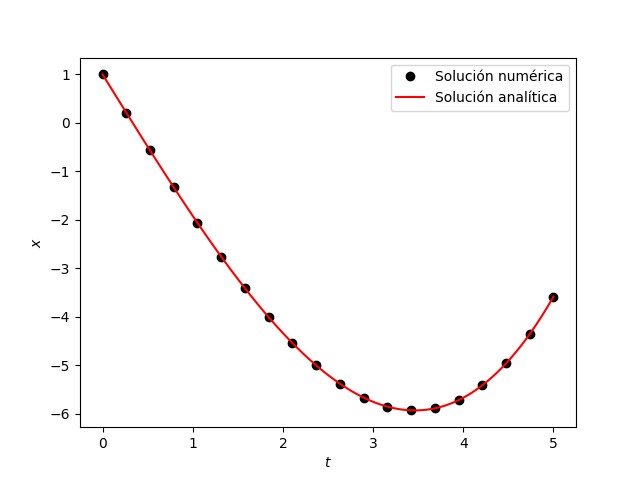

In [8]:
#Valor de las constantes de movimiento 
Ix=Yos[3]-0.5*j0*ts[0]**2
Sx=Yos[0]-(1./6)*j0*ts[0]**3+Ix*ts[0]

#Lista más completa de valores del tiempo
from numpy import linspace
tas=linspace(ts[0],ts[-1],100)

#Solución analítica
xs=(1./6)*j0*tas**3+Ix*tas+Sx

#Gráfico
plt.figure();
plt.plot(ts,Ys[:,0],'ko',label="Solución numérica");
plt.plot(tas,xs,'r-',label="Solución analítica");

plt.xlabel("$t$")
plt.ylabel("$x$")
plt.legend();
plt.show();

<a id='code:compara_numerica_analitica'></a><center><b>Figura 5.38.</b> Comparación de la solución numérica (puntos) y la solución analítica (línea continua) de la e.d.m. de un sistema con tirón constante $j_0=0.5$</center>

La coincidencia entre la solución analítica y la solución numérica mostrada en la Figura ([code:compara_numerica_analitica](#fig:code:compara_numerica_analitica)) es casi perfecta.

#### Integración numérica de las e.d.m. del ejemplo 2

Usando las mismas herramientas y algoritmos análogos a los usados antes, podemos ahora resolver el ejemplo 2 de la [Sección *Integracion de la e.d.m.*](05.01.02.00.Mecanica.Cinematica.SolucionEdM.ipynb#integracion_edm). 

De nuevo, las ecuaciones reducidas del sistema serán, como en el ejemplo 1, las mismas de la Ec. ([edm_reducidas_particula](#mjx-eqn-eq%3Aedm_reducidas_particula)), pero ahora $\{a_i\}=\{-\omega Y_0,0,0\}$ (nótese que hemos reemplazado $x$ por la variable auxiliar $Y_0$ de acuerdo a las reglas en Ec. [variables_auxiliares_edm](#mjx-eqn-eq%3Avariables_auxiliares_edm)).  

La rutina que implementa las `edm` en este caso será:

In [9]:
def edm_ejemplo2(Y,t,omega):
    dYdt=[0,0,0,0,0,0]
    
    dYdt[:3]=Y[3:]
    dYdt[3:]=[-omega*Y[0],0,0]
    
    return dYdt

La solución al sistema, una comprobación de que la constante $C_{Ix}$ en la Ec. ([Ix_ejemplo2](#mjx-eqn-eq%3AIx_ejemplo2)) es en realidad una constante, y una gráfica de la posición como función del tiempo, se muestra en el siguiente algoritmo:

<a id='code:solucion_numerica_ejemplo2'></a>

<IPython.core.display.Javascript object>


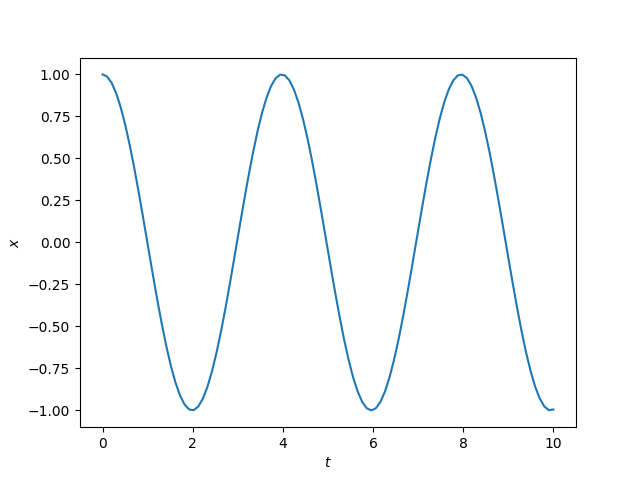

Text(0, 0.5, '$x$')

In [10]:
#Propiedades del sistema
omega=2.5

#Condiciones iniciales
from numpy import array
Yos=array([1,0,0,0,0,0])

#Tiempos
from numpy import linspace
ts=linspace(0,10.0,100)
#Solución
Ys=odeint(edm_ejemplo2,Yos,ts,args=(omega,))

#Constante de movimiento
xs=Ys[:,0]
xdots=Ys[:,3]
C_Ixs=0.5*xdots**2+0.5*omega*xs**2

#Gráfico
fig=plt.figure();
plt.plot(ts,Ys[:,0]);

plt.xlabel("$t$");
plt.ylabel("$x$");
plt.show();

<a id='code:solucion_numerica_ejemplo2'></a><center><b>Figura 5.39.</b> Solución numérica de la e.d.m. de un sistema dinámico con aceleracion $\vec a:(-2.5x,0,0)$.</center>

In [11]:
ax=fig.gca();
ax.set_xlabel("$t$");
ax.set_ylabel("$x$");

In [12]:
print(f"Valores de C_Ix: {C_Ixs[:5]}...")

Valores de C_Ix: [1.25 1.25 1.25 1.25 1.25]...


Podemos comprobar al examinar la Figura ([code:solucion_numerica_ejemplo2](#fig:code:solucion_numerica_ejemplo2)) nuestra intuición inicial de que la dinámica del sistema correspondía a la de un movimiento oscilatorio.

[Indice](index.ipynb) | Previo: [Mecanica.Cinematica.SolucionEdM](05.01.02.00.Mecanica.Cinematica.SolucionEdM.ipynb) | Siguiente: [Mecanica.Dinamica.Cantidades](05.02.00.00.Mecanica.Dinamica.Cantidades.ipynb)